## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
from sklearn.metrics import get_scorer

07-23 18:09:19 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
train_data = pd.read_csv('datasets/West_Nile_Virus/train.csv.gz')
test_data = pd.read_csv('datasets/West_Nile_Virus/test.csv.gz')
X_train = train_data.copy()
y_train = X_train.pop('WnvPresent')
X_test = test_data.copy()
y_test = X_test.pop('WnvPresent')

In [3]:
test_data.info()

,Unnamed: 0,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,7851,"3700 North Kedvale Avenue, Chicago, IL 60641, USA",CULEX PIPIENS/RESTUANS,37,N KEDVALE AVE,T218,"3700 N KEDVALE AVE, Chicago, IL",41.948167,-87.730698,8,9,0
1,6364,"1100 North Artesian Avenue, Chicago, IL 60622,...",CULEX TERRITANS,11,S ARTESIAN AVE,T160,"1100 S ARTESIAN AVE, Chicago, IL",41.903002,-87.688267,8,1,0
2,4429,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,5,0
3,1920,"1000 South California Avenue, Chicago, IL 6061...",CULEX PIPIENS/RESTUANS,10,S CALIFORNIA AVE,T088,"1000 S CALIFORNIA AVE, Chicago, IL",41.869107,-87.696293,9,1,0
4,1463,"West 37th Place, Chicago, IL, USA",CULEX PIPIENS,81,W 37TH PL.,T157,"8100 W 37TH PL., Chicago, IL",41.825902,-87.667827,5,1,0


In [4]:
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2102 non-null   int64  
 1   Address                 2102 non-null   object 
 2   Species                 2102 non-null   object 
 3   Block                   2102 non-null   int64  
 4   Street                  2102 non-null   object 
 5   Trap                    2102 non-null   object 
 6   AddressNumberAndStreet  2102 non-null   object 
 7   Latitude                2102 non-null   float64
 8   Longitude               2102 non-null   float64
 9   AddressAccuracy         2102 non-null   int64  
 10  NumMosquitos            2102 non-null   int64  
 11  WnvPresent              2102 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 197.2+ KB


# Without feature_generation
_best_reward is 0.76

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(8404, 11)","(8404,)","(2102, 11)","(2102,)","(2102, 12)",binary(2)


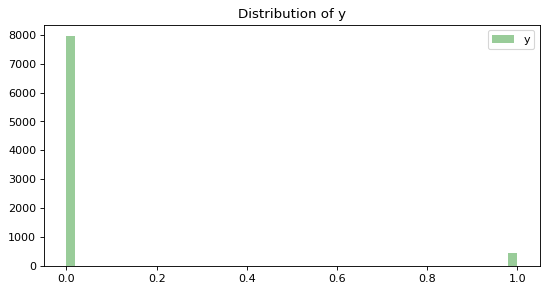

07-23 18:09:21 W hypernets.e.compete.py 1167 - X_train['Unnamed: 0', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos'] and X_test['Unnamed: 0', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Unnamed: 0, Address, Species, Block, Street, ..."
1,selected_features,"[Address, Species, Block, Street, Trap, Addres..."
2,unselected_features,[Unnamed: 0]
3,X_train.shape,"(10506, 10)"
4,y_train.shape,"(10506,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(2102, 10)"
8,unselected_reason,{'Unnamed: 0': 'idness'}
9,kept/dropped feature count,10/1


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[Address, Species, Block, Street, Trap, Addres..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.5213145827610537, 'n_features': 10,..."
4,scores,"{'Address': 0.48401352568692396, 'Species': 0...."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.696703,9,0.782418,151.817905,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,9,0.782418,11.702981,"[1, 3, 1, 1, 0, 0, 2, 2, 3, 1, 0]"
1,5,0.764835,36.716810,"[1, 0, 1, 1, 1, 0, 3, 2, 3, 0, 3]"
2,8,0.738462,4.087050,"[2, 0, 1, 3, 0, 2, 3]"
3,10,0.696703,21.626621,"[1, 3, 1, 2, 0, 1, 4, 0, 0, 4, 3]"
4,6,0.659341,17.687046,"[1, 2, 0, 2, 1, 0, 4, 0, 0, 2]"


#### Best Trial:

key,value
signature,aabad6e27f1e0a7785a3649fc4846852
vectors,"[1, 3, 1, 1, 0, 0, 2, 2, 3, 1, 0]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,True
3-Module_XGBoostEstimator_1.max_depth,5
4-Module_XGBoostEstimator_1.learning_rate,0.001
5-Module_XGBoostEstimator_1.booster,gbtree
6-Module_XGBoostEstimator_1.gamma,1.5
7-Module_XGBoostEstimator_1.min_child_weight,10


### Fitted parameters

,key,value
0,input_features,"[Block, Latitude, Longitude, AddressAccuracy, ..."
1,best_reward,0.760436
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(recall_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.7604355716878403, 0.7604355716878403, 0.760..."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


In [5]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(),target='WnvPresent',
                             reward_metric='recall',pos_label=1,random_state=8888,max_trials=10,
                             class_balancing='RandomUnderSampling')
estimator = experiment.run()

In [6]:
scorer = get_scorer(metric_to_scoring('recall',pos_label=1))
score = scorer(estimator, X_test, y_test)*scorer._sign
score

0.7604166666666666

# Introduce func of feature_generation
-- visit https://github.com/alteryx/featuretools for more datails

In [7]:
from hypernets.tabular.feature_generators import FeatureGenerationTransformer

In [8]:
featureGenerationTransformer = FeatureGenerationTransformer(text_cols=['Address', 'Street', 'AddressNumberAndStreet'])
featureGenerationTransformer.fit(pd.DataFrame(X_train[['Address', 'Street', 'AddressNumberAndStreet']]))
X_test_new = featureGenerationTransformer.transform(pd.DataFrame(X_test[['Address', 'Street', 'AddressNumberAndStreet']]))

Elapsed: 00:00 | Progress: 100%|██████████


In [9]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2101
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Address                               2102 non-null   object 
 1   Street                                2102 non-null   object 
 2   AddressNumberAndStreet                2102 non-null   object 
 3   TFIDF__Address____0__                 2102 non-null   float64
 4   TFIDF__Address____1__                 2102 non-null   float64
 5   TFIDF__Address____2__                 2102 non-null   float64
 6   TFIDF__AddressNumberAndStreet____0__  2102 non-null   float64
 7   TFIDF__AddressNumberAndStreet____1__  2102 non-null   float64
 8   TFIDF__AddressNumberAndStreet____2__  2102 non-null   float64
 9   TFIDF__Street____0__                  2102 non-null   float64
 10  TFIDF__Street____1__                  2102 non-null   float64
 11  TFIDF__Street____

In [10]:
X_test_new.head()

,Address,Street,AddressNumberAndStreet,TFIDF__Address____0__,TFIDF__Address____1__,TFIDF__Address____2__,TFIDF__AddressNumberAndStreet____0__,TFIDF__AddressNumberAndStreet____1__,TFIDF__AddressNumberAndStreet____2__,TFIDF__Street____0__,TFIDF__Street____1__,TFIDF__Street____2__
e_hypernets_ft_index,,,,,,,,,,,,
0,"3700 North Kedvale Avenue, Chicago, IL 60641, USA",N KEDVALE AVE,"3700 N KEDVALE AVE, Chicago, IL",0.331686,-0.048208,-0.029693,0.282397,-0.119580,-0.033765,-0.000020,0.293108,4.430231e-05
1,"1100 North Artesian Avenue, Chicago, IL 60622,...",S ARTESIAN AVE,"1100 S ARTESIAN AVE, Chicago, IL",0.395556,-0.062693,-0.039486,0.333972,-0.147600,-0.019233,-0.000004,0.297266,7.748854e-05
2,"ORD Terminal 5, O'Hare International Airport, ...",W OHARE AIRPORT,"1000 W OHARE AIRPORT, Chicago, IL",0.254049,0.935986,-0.239154,0.491271,0.846968,-0.103219,0.998382,0.000004,6.262481e-08
3,"1000 South California Avenue, Chicago, IL 6061...",S CALIFORNIA AVE,"1000 S CALIFORNIA AVE, Chicago, IL",0.313601,-0.073830,-0.107058,0.425939,0.106203,-0.104172,-0.000041,0.299766,-2.052937e-05
4,"West 37th Place, Chicago, IL, USA",W 37TH PL.,"8100 W 37TH PL., Chicago, IL",0.586588,0.098636,0.506752,0.223254,-0.031684,0.067009,-0.000004,-0.000001,1.006995e-03


## Advanced setting for feature_generation-text

In [11]:
featureGenerationTransformer = FeatureGenerationTransformer(text_cols=['Address', 'Street', 'AddressNumberAndStreet'],
                                                            trans_primitives=["num_characters", "num_words" ,"tfidf"])
featureGenerationTransformer.fit(pd.DataFrame(X_train[['Address', 'Street', 'AddressNumberAndStreet']]))
X_test_new = featureGenerationTransformer.transform(pd.DataFrame(X_test[['Address', 'Street', 'AddressNumberAndStreet']]))

Elapsed: 00:00 | Progress: 100%|██████████


In [12]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2101
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Address                                   2102 non-null   object 
 1   Street                                    2102 non-null   object 
 2   AddressNumberAndStreet                    2102 non-null   object 
 3   NUM_CHARACTERS__Address__                 2102 non-null   int64  
 4   NUM_CHARACTERS__AddressNumberAndStreet__  2102 non-null   int64  
 5   NUM_CHARACTERS__Street__                  2102 non-null   int64  
 6   NUM_WORDS__Address__                      2102 non-null   int64  
 7   NUM_WORDS__AddressNumberAndStreet__       2102 non-null   int64  
 8   NUM_WORDS__Street__                       2102 non-null   int64  
 9   TFIDF__Address____0__                     2102 non-null   float64
 10  TFIDF__Address____1__               

In [13]:
X_test_new.head()

,Address,Street,AddressNumberAndStreet,NUM_CHARACTERS__Address__,NUM_CHARACTERS__AddressNumberAndStreet__,NUM_CHARACTERS__Street__,NUM_WORDS__Address__,NUM_WORDS__AddressNumberAndStreet__,NUM_WORDS__Street__,TFIDF__Address____0__,TFIDF__Address____1__,TFIDF__Address____2__,TFIDF__AddressNumberAndStreet____0__,TFIDF__AddressNumberAndStreet____1__,TFIDF__AddressNumberAndStreet____2__,TFIDF__Street____0__,TFIDF__Street____1__,TFIDF__Street____2__
e_hypernets_ft_index,,,,,,,,,,,,,,,,,,
0,"3700 North Kedvale Avenue, Chicago, IL 60641, USA",N KEDVALE AVE,"3700 N KEDVALE AVE, Chicago, IL",49,32,14,8,7,4,0.331687,-0.048053,-0.029509,0.282393,-0.119663,-0.033751,-0.000026,2.931117e-01,-1.411844e-04
1,"1100 North Artesian Avenue, Chicago, IL 60622,...",S ARTESIAN AVE,"1100 S ARTESIAN AVE, Chicago, IL",50,33,15,8,7,4,0.395560,-0.063030,-0.039279,0.333970,-0.147651,-0.019144,-0.000006,2.972552e-01,-7.988119e-05
2,"ORD Terminal 5, O'Hare International Airport, ...",W OHARE AIRPORT,"1000 W OHARE AIRPORT, Chicago, IL",68,34,16,10,7,4,0.254049,0.935981,-0.239152,0.491271,0.846982,-0.103117,0.998382,-7.792179e-07,-1.080983e-07
3,"1000 South California Avenue, Chicago, IL 6061...",S CALIFORNIA AVE,"1000 S CALIFORNIA AVE, Chicago, IL",52,35,17,8,7,4,0.313602,-0.073889,-0.107091,0.425940,0.106138,-0.104437,0.000041,2.997481e-01,1.262725e-04
4,"West 37th Place, Chicago, IL, USA",W 37TH PL.,"8100 W 37TH PL., Chicago, IL",33,29,11,6,7,4,0.586588,0.098718,0.506800,0.223251,-0.031686,0.067270,0.000008,-1.149166e-07,1.099264e-03


# Use feature_generation
_best_reward is 0.802

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(8404, 11)","(8404,)","(2102, 11)","(2102,)","(2102, 12)",binary(2)


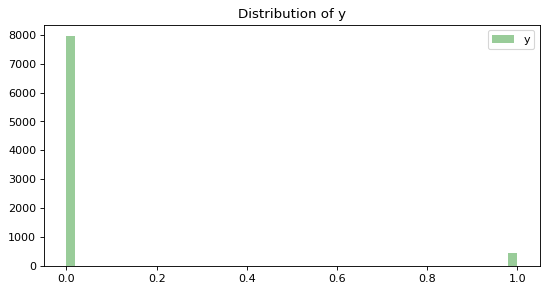

07-23 18:11:57 W hypernets.e.compete.py 1167 - X_train['Unnamed: 0', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos'] and X_test['Unnamed: 0', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Unnamed: 0, Address, Species, Block, Street, ..."
1,selected_features,"[Address, Species, Block, Street, Trap, Addres..."
2,unselected_features,[Unnamed: 0]
3,X_train.shape,"(10506, 10)"
4,y_train.shape,"(10506,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(2102, 10)"
8,unselected_reason,{'Unnamed: 0': 'idness'}
9,kept/dropped feature count,10/1


## Feature Generation

### Initliazed parameters

,key,value
0,categories_cols,None
1,continuous_cols,None
2,datetime_cols,None
3,feature_selection_args,None
4,latlong_cols,None
5,max_depth,1
6,name,feature_generation
7,text_cols,"[Address, Street, AddressNumberAndStreet]"
8,trans_primitives,"[num_characters, num_words, tfidf]"


Elapsed: 00:00 | Progress: 100%|██████████
Elapsed: 00:00 | Progress: 100%|██████████


### Fitted parameters

,key,value
0,input_features,"[Address, Species, Block, Street, Trap, Addres..."
1,trans_primitives,"[num_characters, num_words, tfidf]"
2,output_feature_names,"[Block, Latitude, Longitude, AddressAccuracy, ..."


## Feature Selection

### Initliazed parameters

,key,value
0,name,feature_selection
1,number,12
2,quantile,None
3,strategy,None
4,threshold,None


### Fitted parameters

,key,value
0,input_features,"[Block, Latitude, Longitude, AddressAccuracy, ..."
1,selected_features,"[Block, Latitude, Longitude, AddressAccuracy, ..."
2,unselected_features,"[Species, NUM_CHARACTERS__AddressNumberAndStre..."
3,importances,"[454.9563607573509, 184.55116593837738, 103.56..."


### Feature importances

,feature,importance,selected
6,Trap,1607.144014,True
0,Block,454.956361,True
4,NumMosquitos,287.170439,True
3,AddressAccuracy,215.944264,True
1,Latitude,184.551166,True
20,TFIDF__Street____1__,161.875723,True
13,TFIDF__Address____0__,130.302464,True
7,NUM_CHARACTERS__Address__,112.394371,True
19,TFIDF__Street____0__,110.735551,True
16,TFIDF__AddressNumberAndStreet____0__,107.933402,True


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.569873,4,0.760436,247.248195,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,4,0.760436,8.873434,"[0, 0, 1, 2, 15, 0, 0, 5, 4, 2]"
1,1,0.727768,44.664030,"[1, 3, 0, 1, 1, 1, 3, 1, 2, 3]"
2,3,0.667877,23.997445,"[0, 1, 0, 1, 415, 1, 0, 4, 0]"
3,7,0.597096,4.447454,"[2, 3, 1, 2, 0, 4, 0]"
4,10,0.569873,51.949430,"[0, 1, 0, 0, 315, 2, 1, 2, 1]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 0, 1, 2, 15, 0, 0, 5, 4, 2]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,goss
4-Module_LightGBMEstimator_1.num_leaves,15
5-Module_LightGBMEstimator_1.max_depth,3
6-Module_LightGBMEstimator_1.learning_rate,0.001
7-Module_LightGBMEstimator_1.reg_alpha,100


### Fitted parameters

,key,value
0,input_features,"[Block, Latitude, Longitude, AddressAccuracy, ..."
1,best_reward,0.760436
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(recall_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.7604355716878403, 0.7604355716878403, 0.760..."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


Elapsed: 00:00 | Progress: 100%|██████████


0.8020833333333334

In [14]:
experiment = make_experiment(train_data.copy(),eval_data=test_data.copy(),test_data=test_data.copy(),target='WnvPresent',
                             random_state=8888,max_trials=10,reward_metric='recall',pos_label=1,class_balancing='RandomUnderSampling',
                             feature_generation=True,
                             feature_generation_trans_primitives=["num_characters", "num_words" ,"tfidf"],
                             feature_generation_text_cols=['Address', 'Street', 'AddressNumberAndStreet'],
                             drift_detection=False,
                             feature_selection=True,
                             feature_selection_number=12
                            )
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('recall',pos_label=1))
score = scorer(estimator, X_test, y_test)
score